skill demand

In [61]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Great question, Julio — especially since you’ve been exploring data cleaning! 🧼 The .explode() method in pandas is a powerful tool for transforming lists within DataFrame cells into separate rows. It’s super handy when a column contains arrays, lists, or any sequence-like values.


also the groupby() and size() to see the number of columns

In [62]:
df_US = df[df['job_country'] == 'United States'].copy()
#now we explode why? transforms list within dataframe into sepetate rows
df_skills = df_US.explode('job_skills')

# so we already have the country, now we want the job skills and the job title will be series

In [63]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

since its a series, we must convert it into a dataframe by reset_index(), above its messy, reset_index() gives us three seperate columns?

In [64]:
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count


,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


now we need to .sort_values() by the skill count, meaning we add up the skill count 

In [65]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


Now we need the top 3 roles, data analyst, engineer, and scientist. get all jobs that have these unique keywords, then make it into a list

we'll use a slicer (more complicated route, do the list of the three, but good to know for the future)

In [66]:
# job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
# or hard code it in ⬇️ either or
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])  # sorted() in alphabetical order

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Now we plot

here the len is used and the job_titles variable is our (3 rows, 1 is the column)

1. Now the iteration ! we use a for loop pulling out the index, and the job_titles name out of the job_titles list using enumerate.

2. then we plot using our df_skills_count DB from above ⬆️

3. then we plot using a bar chart

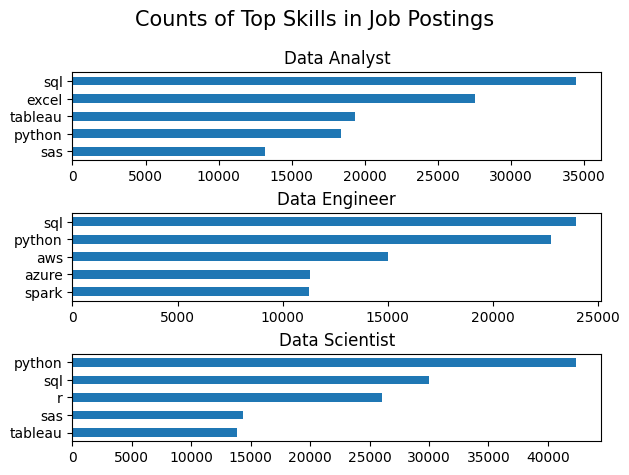

In [76]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
        df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
        df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
        ax[i].invert_yaxis()
        ax[i].set_ylabel('')
        ax[i].legend().set_visible(False)
        
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15) # yes its sup!
fig.tight_layout(h_pad=0.5) # fix overlap
plt.show()


now we must do convert these counts to a percentage, performan aggregation

for this process REMEMBER to use the right dataframe. that is the original df_US, make a new variable obviously

In [91]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')


now we have to merge this with our df_skills_count this df_US dataset with its new 'name'

In [92]:
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [95]:
df_skills_count  # we merge these two ⬇️⬆️

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


here we merge in a left join, they join at job_title_short

In [100]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

#now calculate skill percentage, making a new column do this math.
df_skills_percent['skill_percent'] = 100 * df_skills_percent['skill_count'] / df_skills_percent['jobs_total']

df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


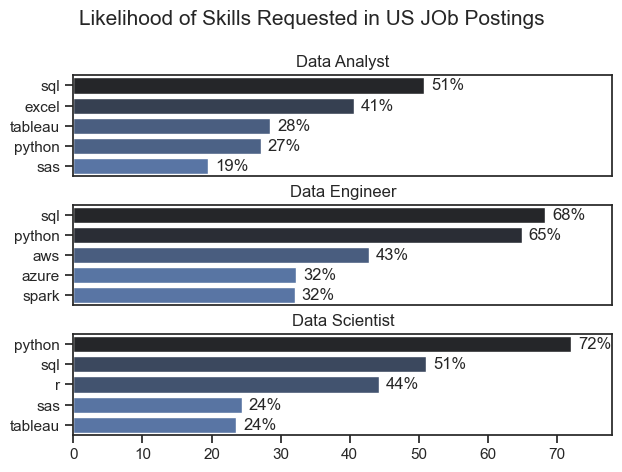

In [120]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
        df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
        # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
        sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
        ax[i].set_title(job_title)
        ax[i].set_ylabel('')
        ax[i].set_xlabel('')
        ax[i].legend().set_visible(False)
        ax[i].set_xlim(0, 78)
        
        
        for n, v in enumerate(df_plot['skill_percent']):
            ax[i].text(v + 1, n, f'{v:.0f}%', va='center')  # v is x axis , n is y axis this is to space it and percentage syntax !!!✅ 
        
# loop the percentage on the bar chart
        # for exact percentage do    f'{v:.0f}'   f=float at end
        
        if i != len(job_titles) - 1:
            ax[i].set_xticks([]) # removes the bottom numbers for no clutter, but we want to keep the last one with numbers on x axis so if
                                # statement! only bottom grapgh should have it so its cluttery
        
fig.suptitle('Likelihood of Skills Requested in US JOb Postings', fontsize=15) # yes its sup!
fig.tight_layout(h_pad=0.5) # fix overlap
plt.show()